<a href="https://colab.research.google.com/github/chaitsugale/Stock-Market-Prediction-The-Spark-Foundation-/blob/main/Stock_Market_Prediction_Using_Numerical_and_Textual_Analysis(The_Spark_Foundation).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stock Market Prediction Using Numerical and Textual Analysis

Objective: Create a hybrid model for stock price/performance
prediction using numerical analysis of historical stock prices, and
sentimental analysis of news headlines

Here We are analyzing and predicting the stocks of BOMBAY STOCK EXCHANGE i.e. SENSEX (S&F BSE SENSEX) 

SENSEX or BOMBAY STOCK EXCHANGE is the oldest stock exchange in ASIA establishing in 1875.

## Step 1: Loading the Package

> Loading all the important packages for analyzing and predicting alonng with plotting graph



In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import altair as alt  #Altair is a declarative statistical visualization library for Python

import statsmodels.api as sm 

from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.multioutput import RegressorChain
from sklearn.ensemble import RandomForestRegressor

In [2]:
import warnings
warnings.filterwarnings('ignore')

Here We will extracting the data of **Bombay Stock Exchange** from yahoo finance through **Python API**

So we are installing the PYPI yfinance

In [3]:
# installing pypi package for yahoo finance


!pip install yfinance --upgrade --no-cache-dir

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import yfinance as yf

In [5]:
bse_data = yf.download('^BSESN',start = '2001-01-01',end = '2022-03-31')
print(bse_data)

[*********************100%***********************]  1 of 1 completed
                    Open          High           Low         Close  \
Date                                                                 
2001-01-02   3953.219971   4028.570068   3929.370117   4018.879883   
2001-01-03   3977.580078   4067.659912   3977.580078   4060.020020   
2001-01-04   4180.970215   4180.970215   4109.549805   4115.370117   
2001-01-05   4116.339844   4195.009766   4115.350098   4183.729980   
2001-01-08   4164.759766   4206.720215   4101.529785   4120.430176   
...                  ...           ...           ...           ...   
2022-03-24  57190.050781  57827.988281  57138.511719  57595.679688   
2022-03-25  57801.718750  57845.371094  57100.238281  57362.199219   
2022-03-28  57472.718750  57638.339844  56825.089844  57593.488281   
2022-03-29  57814.761719  58001.531250  57639.351562  57943.648438   
2022-03-30  58362.851562  58727.781250  58176.000000  58683.988281   

               Adj C

In [6]:
bse_data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [7]:
bse_data.reset_index(inplace=True)

In [8]:
bse_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2001-01-02,3953.219971,4028.570068,3929.370117,4018.879883,4018.879883,0
1,2001-01-03,3977.580078,4067.659912,3977.580078,4060.020020,4060.020020,0
2,2001-01-04,4180.970215,4180.970215,4109.549805,4115.370117,4115.370117,0
3,2001-01-05,4116.339844,4195.009766,4115.350098,4183.729980,4183.729980,0
4,2001-01-08,4164.759766,4206.720215,4101.529785,4120.430176,4120.430176,0


In [9]:
bse_data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
5229,2022-03-24,57190.050781,57827.988281,57138.511719,57595.679688,57595.679688,51400
5230,2022-03-25,57801.718750,57845.371094,57100.238281,57362.199219,57362.199219,6900
5231,2022-03-28,57472.718750,57638.339844,56825.089844,57593.488281,57593.488281,6300
5232,2022-03-29,57814.761719,58001.531250,57639.351562,57943.648438,57943.648438,12100
5233,2022-03-30,58362.851562,58727.781250,58176.000000,58683.988281,58683.988281,6300


In [10]:
bse_data.shape

(5234, 7)

In [11]:
bse_data.size#bse_data.to_csv('bse.csv')

36638

In [12]:
bse_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5234 entries, 0 to 5233
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       5234 non-null   datetime64[ns]
 1   Open       5234 non-null   float64       
 2   High       5234 non-null   float64       
 3   Low        5234 non-null   float64       
 4   Close      5234 non-null   float64       
 5   Adj Close  5234 non-null   float64       
 6   Volume     5234 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 286.4 KB


In [13]:
bse_data.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [14]:
bse_data['Date'] = pd.to_datetime(bse_data['Date'])

In [15]:
bse_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5234 entries, 0 to 5233
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       5234 non-null   datetime64[ns]
 1   Open       5234 non-null   float64       
 2   High       5234 non-null   float64       
 3   Low        5234 non-null   float64       
 4   Close      5234 non-null   float64       
 5   Adj Close  5234 non-null   float64       
 6   Volume     5234 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 286.4 KB


In [16]:
def bse_stock_weekly_moving_avg(weeks,df):
  close_data = pd.DataFrame({'date': df['Date'] , 'close': df['Close']})
  close_data.set_index('date',inplace=True)
  num = weeks * 5
  close_data['moving_avg'] = close_data['close'].rolling(window = num).mean().shift()
  return close_data.dropna()

In [25]:
bse_stock_weekly_moving_avg(4,bse_data).head()

,close,moving_avg
date,,
2001-01-31,4326.720215,4153.535486
2001-02-01,4286.109863,4168.927502
2001-02-02,4352.259766,4180.231995
2001-02-05,4370.470215,4192.076477
2001-02-06,4375.290039,4201.413489


<AxesSubplot:xlabel='date'>

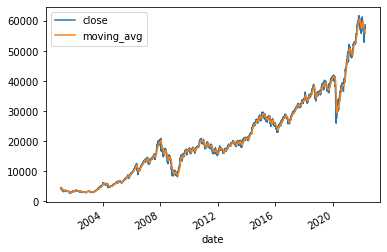

In [26]:
bse_stock_weekly_moving_avg(4,bse_data).plot()

Text(0, 0.5, 'Close')

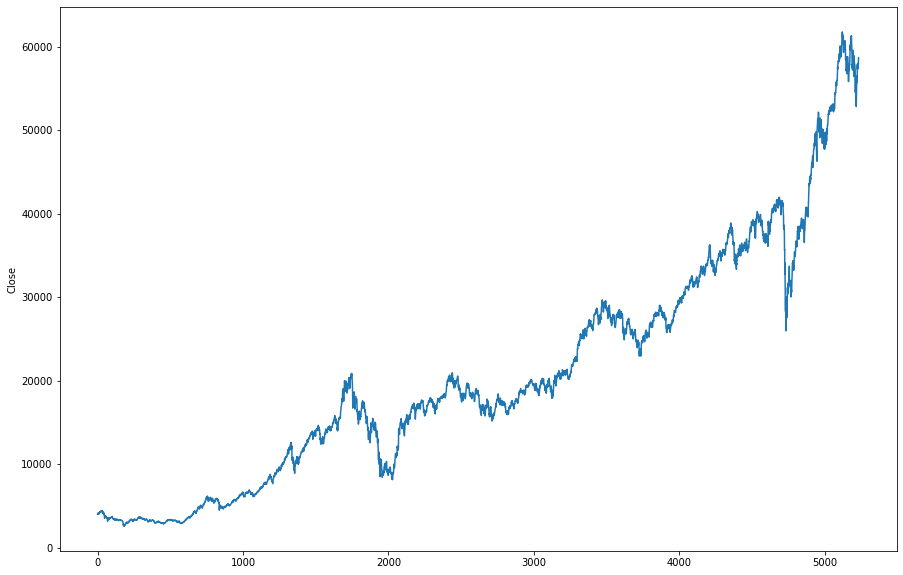

In [45]:
plt.figure(figsize=(15, 10))
bse_data['Close'].plot()
plt.ylabel('Close')

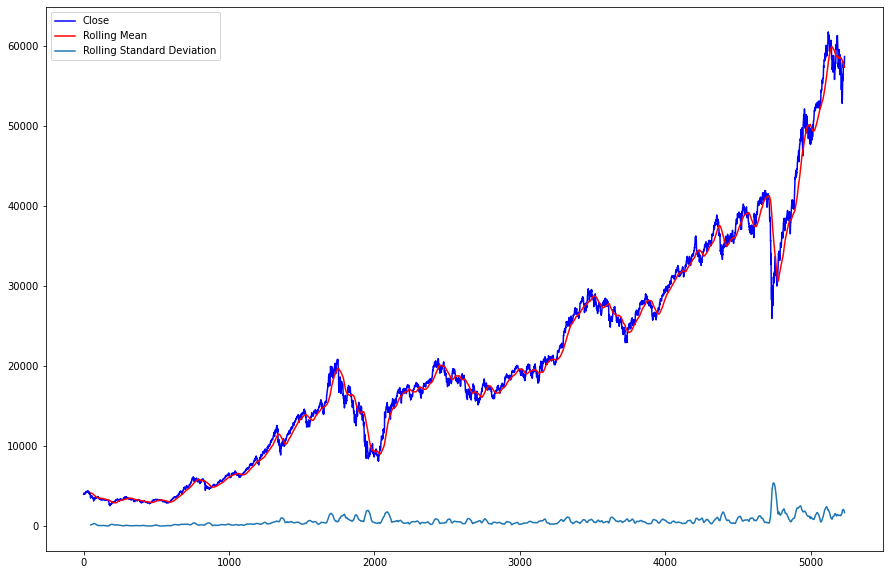

In [44]:
#Plotting moving average for window 50
bse_close = bse_data['Close']
ma_50 = bse_close.rolling(window = 50).mean()
std_50 = bse_close.rolling(window = 50).std()

plt.figure(figsize=(15, 10))
bse_data['Close'].plot(color = 'b', label = 'Close')
ma_50.plot(color = 'r', label = 'Rolling Mean')
std_50.plot(label = 'Rolling Standard Deviation')
plt.legend()

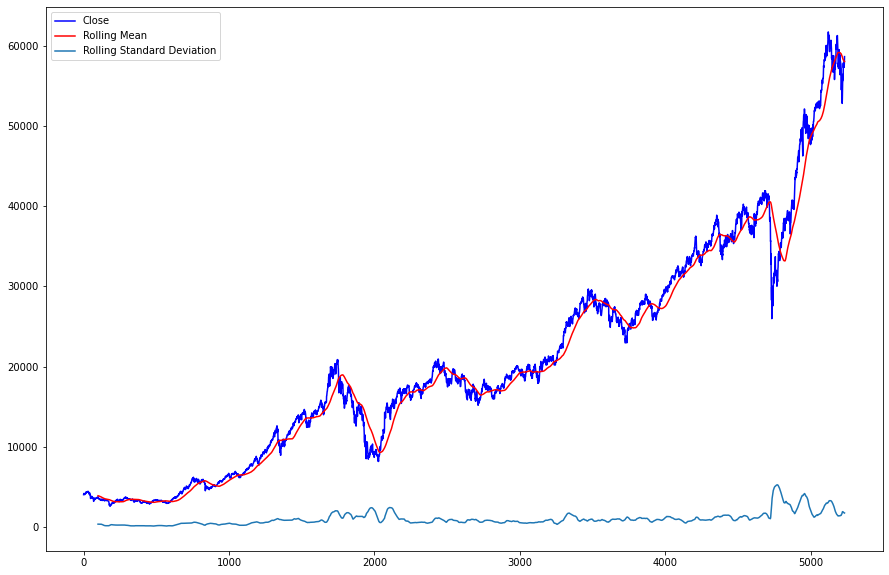

In [46]:
#Plotting moving average for window 100
bse_close = bse_data['Close']
ma_100 = bse_close.rolling(window = 100).mean()
std_100 = bse_close.rolling(window = 100).std()

plt.figure(figsize=(15, 10))
bse_data['Close'].plot(color = 'b', label = 'Close')
ma_100.plot(color = 'r', label = 'Rolling Mean')
std_100.plot(label = 'Rolling Standard Deviation')
plt.legend()

Text(0.5, 1.0, 'Returns')

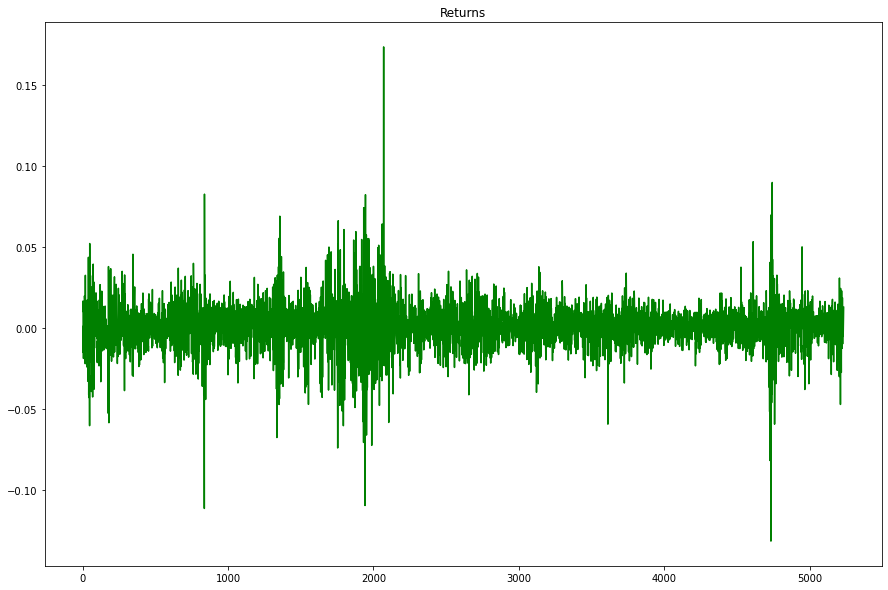

In [50]:
# Plotting return

bse_returns =  bse_close/bse_close.shift(1) - 1

plt.figure(figsize=(15, 10))

bse_returns.plot(label='Return' , color = 'green')

plt.title('Returns')